# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import matplotlib.pyplot as plt

In [2]:
!pip install spacy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import spacy
spacy.__version__

2023-05-29 21:47:35.190966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 21:47:37.347299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-29 21:47:37.347345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: c50bc674bc27
2023-05-29 21:47:37.347352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: c50bc674bc27
2023-05-29 21:47:37.347441: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-05-29 21:47:37.347467: I

'3.5.3'

In [4]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [5]:
!python3 -m spacy download en_core_web_lg

2023-05-29 21:47:41.749705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [6]:
import en_core_web_lg

In [7]:
nlp = en_core_web_lg.load()
nlp

In [8]:
!pip install pandas
!pip install seaborn
!pip install numpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# Etapa 2: Carregamento da base de dados

In [10]:
base_dados = pd.read_csv('sentimentos.csv', encoding = 'utf-8')

In [11]:
base_dados.shape

(11786, 7)

In [12]:
base_dados.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,Crashed too often. Confusing. It shows for ex....,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos
2,"I have a limited data plan, so I figured that ...",A Google user,2,1,0,0,sentimentos
3,This app is not working at all. As soon as I c...,Shounak Basu,1,1,0,0,sentimentos
4,"Google GO apps are garbage. They load slow, cr...",Some Guy,1,1,0,0,sentimentos


In [13]:
base_dados.tail()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
11781,Duraivelm,duraivel M,5,0,0,1,sentimentos
11782,J R,mαrч jσч αdríαnσ,5,0,0,1,sentimentos
11783,Ok,rza,5,0,0,1,sentimentos
11784,You,Habib Abbasi,2,1,0,0,sentimentos
11785,Niestety na razie aplikacja nie zdaje egzaminu...,Błażej BM,1,1,0,0,sentimentos


<Axes: xlabel='Rating', ylabel='count'>

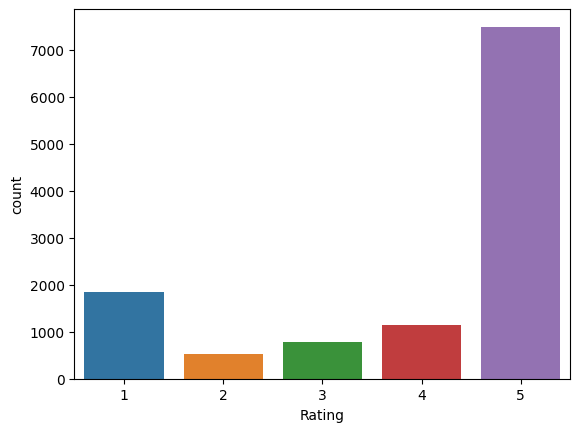

In [14]:
base_dados['Rating'] = base_dados['Rating'].round()
sns.countplot(x='Rating', data=base_dados)

# Etapa 3: Função para pré-processamento dos textos

In [15]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [17]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [18]:
len(stop_words)

416

In [19]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [20]:
import re
def remove_caracteres_especiais(texto):
    return re.sub(r'[^\w\s]', '', texto)


In [21]:
def preprocessamento(texto):
    try:
        texto = remove_caracteres_especiais(texto)  
        texto = texto.lower()
        documento = nlp(texto)

        lista = []
        for token in documento:
            lista.append(token.lemma_)

        lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
        lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

        return lista

    except Exception as e:
        print(f"Erro ao processar texto: {e}")
        return None


In [22]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprendendo processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [23]:
base_dados.head(10)

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,Crashed too often. Confusing. It shows for ex....,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos
2,"I have a limited data plan, so I figured that ...",A Google user,2,1,0,0,sentimentos
3,This app is not working at all. As soon as I c...,Shounak Basu,1,1,0,0,sentimentos
4,"Google GO apps are garbage. They load slow, cr...",Some Guy,1,1,0,0,sentimentos
5,1. Not enough options 2. Cant make new folders...,A Google user,1,1,0,0,sentimentos
6,i think that as far as i can tell it is functi...,A Google user,3,0,1,0,sentimentos
7,"It has no update, no option for light or dark ...",Timmy Mith,1,1,0,0,sentimentos
8,"This App, hasn't worked for a week, for one sp...",A Google user,1,1,0,0,sentimentos
9,Well ill say it's easy to get lost in Gmail. F...,A Google user,2,1,0,0,sentimentos


In [24]:
base_dados['Review'] = base_dados['Review'].apply(preprocessamento).fillna('')

Erro ao processar texto: expected string or bytes-like object


In [25]:
base_dados.head(10)

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,crash too often confuse it show ex mail in spa...,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,it only look like the legit app but none of th...,Harold Galbreath,1,1,0,0,sentimentos
2,I have limited datum plan so I figure that thi...,A Google user,2,1,0,0,sentimentos
3,this app be not work at all soon I click an em...,Shounak Basu,1,1,0,0,sentimentos
4,google go app be garbage they load slow crash ...,Some Guy,1,1,0,0,sentimentos
5,not enough option can not make new folder if y...,A Google user,1,1,0,0,sentimentos
6,I think that far I can tell it be functional a...,A Google user,3,0,1,0,sentimentos
7,it have update option light or dark theme it b...,Timmy Mith,1,1,0,0,sentimentos
8,this app have not work week one specific gmail...,A Google user,1,1,0,0,sentimentos
9,well ill say its easy to get lose in gmail tho...,A Google user,2,1,0,0,sentimentos


### Tratamento da classe

In [26]:
exemplo_base_dados = [["este trabalho é agradável", {"Negative": True, "Neutral": False, "Positive": False}],
                      ["este lugar continua assustador", {"Negative": False, "Neutral": True, "Positive": False}]]

In [27]:
type(exemplo_base_dados)

list

In [28]:
exemplo_base_dados[0]

['este trabalho é agradável',
 {'Negative': True, 'Neutral': False, 'Positive': False}]

In [29]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [30]:
exemplo_base_dados[0][1]

{'Negative': True, 'Neutral': False, 'Positive': False}

In [31]:
type(exemplo_base_dados[0][1])

dict

In [32]:
base_dados_final = []
for texto, negative, neutral, positive in zip(base_dados['Review'], base_dados['NegativeRating'], base_dados['NeutralRatings'], base_dados['PositiveFeeling']):
  #print(texto, emocao)
  if negative == 1:
    dic = ({"Negative": True, "Neutral": False, "Positive": False})
  elif neutral == 1:
    dic = ({"Negative": False, "Neutral": True, "Positive": False})
  else: 
    dic = ({"Negative": False, "Neutral": False, "Positive": True})  

  base_dados_final.append([texto, dic.copy()])


In [33]:
len(base_dados_final)

11786

In [34]:
base_dados_final[0]

['crash too often confuse it show ex mail in spamfolder but when I go there its empty after week I have mail at all I m afraid to uninstall since it prompt I that that could cause my phone to malfunction I m seriously frustrate prior to this experience my only issue be to create folder w different name to organize mail',
 {'Negative': True, 'Neutral': False, 'Positive': False}]

In [35]:
base_dados_final[0][0]

'crash too often confuse it show ex mail in spamfolder but when I go there its empty after week I have mail at all I m afraid to uninstall since it prompt I that that could cause my phone to malfunction I m seriously frustrate prior to this experience my only issue be to create folder w different name to organize mail'

In [36]:
base_dados_final[0][1]

{'Negative': True, 'Neutral': False, 'Positive': False}

In [37]:
type(base_dados_final[0][1])

dict

In [38]:
base_dados_final

[['crash too often confuse it show ex mail in spamfolder but when I go there its empty after week I have mail at all I m afraid to uninstall since it prompt I that that could cause my phone to malfunction I m seriously frustrate prior to this experience my only issue be to create folder w different name to organize mail',
  {'Negative': True, 'Neutral': False, 'Positive': False}],
 ['it only look like the legit app but none of the even basic function of gmail correctly its strip down in all the wrong way push notification not work correctly even with everything turn on archive message not go into the proper label the trash will not completely empty even when select empty trash and to get any action to perform it take repeat tap and to register grossly inadequate to the task its mean to perform not quality resource friendly build',
  {'Negative': True, 'Neutral': False, 'Positive': False}],
 ['I have limited datum plan so I figure that this might be the way to go it be preinstalle on my

# Etapa 5: Criação do classificador

In [39]:
import spacy

In [40]:
#spacy.require_gpu()

In [41]:
from spacy.training import Example

In [42]:
modelo = spacy.blank('en')
textcat = modelo.add_pipe("textcat")
textcat.add_label("Negative")
textcat.add_label("Neutral")
textcat.add_label("Positive")
historico = []

In [43]:
try:
    modelo.begin_training()
    for epoca in range(400):
      random.shuffle(base_dados_final)
      losses = {}
      for batch in spacy.util.minibatch(base_dados_final, 3536):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(textos, annotations)]
        modelo.update(examples, losses=losses)
      if epoca % 100 == 0:
        print(epoca, losses)
        historico.append(losses)
except Exception as e:
    print(f"Erro durante o treinamento: {e}")

0 {'textcat': 0.8359124809503555}
100 {'textcat': 0.08853131346404552}
200 {'textcat': 0.09316263906657696}
300 {'textcat': 0.08933885768055916}


In [44]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))


In [45]:
historico_loss = np.array(historico_loss)
historico_loss

array([0.83591248, 0.08853131, 0.09316264, 0.08933886])

Text(0, 0.5, 'Erro')

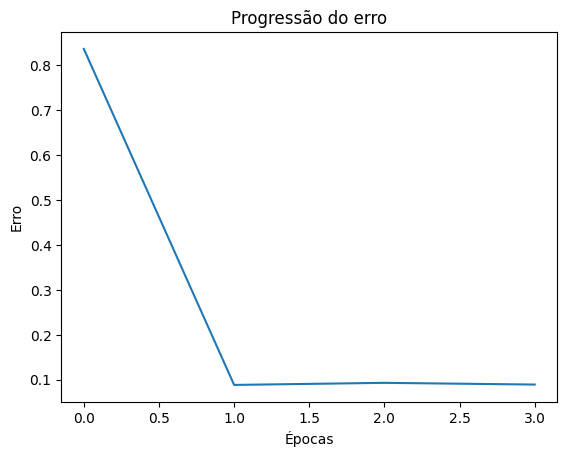

In [46]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')


In [47]:
modelo.to_disk("modelo")

In [48]:
#!zip -r /content/modelo.zip /content/modelo

In [49]:
#from google.colab import files
#files.download("modelo.zip")

# Etapa 6: Testes com uma frase

In [50]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [51]:
texto_positivo = 'Parabéns pelo app!'

In [52]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'parabéns app'

In [53]:
previsao = modelo_carregado(texto_positivo)
previsao

parabéns app

In [54]:
previsao.cats

{'Negative': 0.0001697148400126025,
 'Neutral': 5.1757731853285804e-05,
 'Positive': 0.9997785687446594}

In [55]:
texto_negativo = 'Nao tem os dados... mds!!!!'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'Negative': 0.06720134615898132,
 'Neutral': 0.0011779074557125568,
 'Positive': 0.9316207766532898}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [56]:
previsoes = []
for texto in base_dados['Review']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [57]:
previsoes

[{'Negative': 0.9999697208404541,
  'Neutral': 7.483549211428908e-07,
  'Positive': 2.958642835437786e-05},
 {'Negative': 0.9999371767044067,
  'Neutral': 1.4929407370800618e-05,
  'Positive': 4.790202365256846e-05},
 {'Negative': 0.9996496438980103,
  'Neutral': 0.00023676342971157283,
  'Positive': 0.00011357487528584898},
 {'Negative': 0.9996956586837769,
  'Neutral': 5.418419823399745e-05,
  'Positive': 0.0002500882837921381},
 {'Negative': 0.9999388456344604,
  'Neutral': 2.208642627010704e-06,
  'Positive': 5.8864985476247966e-05},
 {'Negative': 0.9999384880065918,
  'Neutral': 1.5389608961413614e-05,
  'Positive': 4.6188884880393744e-05},
 {'Negative': 3.088053927058354e-05,
  'Neutral': 0.9998705387115479,
  'Positive': 9.857366239884868e-05},
 {'Negative': 0.9999480247497559,
  'Neutral': 1.4593478226743173e-05,
  'Positive': 3.7442157918121666e-05},
 {'Negative': 0.9999045133590698,
  'Neutral': 4.67364297946915e-05,
  'Positive': 4.8719368351157755e-05},
 {'Negative': 0.9998

In [58]:
previsoes_final = []
for previsao in previsoes:
  if previsao['Negative'] > previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Negative')
  elif previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Neutral')  
  else:
    previsoes_final.append('Positive')

previsoes_final = np.array(previsoes_final)

In [59]:
previsoes_final

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [60]:
respostas_reais = base_dados['Review'].values
respostas_reais

array(['crash too often confuse it show ex mail in spamfolder but when I go there its empty after week I have mail at all I m afraid to uninstall since it prompt I that that could cause my phone to malfunction I m seriously frustrate prior to this experience my only issue be to create folder w different name to organize mail',
       'it only look like the legit app but none of the even basic function of gmail correctly its strip down in all the wrong way push notification not work correctly even with everything turn on archive message not go into the proper label the trash will not completely empty even when select empty trash and to get any action to perform it take repeat tap and to register grossly inadequate to the task its mean to perform not quality resource friendly build',
       'I have limited datum plan so I figure that this might be the way to go it be preinstalle on my phone unfortunately this app be pretty buggy I have mulitple gmail account and switch between they resul

In [61]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Avaliação na base de teste

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
base_dados_teste = pd.read_csv('sentimentos.csv', encoding = 'utf-8')

In [66]:
base_dados_teste.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,Crashed too often. Confusing. It shows for ex....,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos
2,"I have a limited data plan, so I figured that ...",A Google user,2,1,0,0,sentimentos
3,This app is not working at all. As soon as I c...,Shounak Basu,1,1,0,0,sentimentos
4,"Google GO apps are garbage. They load slow, cr...",Some Guy,1,1,0,0,sentimentos


In [67]:
base_dados_teste['Review'] = base_dados_teste['Review'].apply(preprocessamento).fillna('')

Erro ao processar texto: expected string or bytes-like object


In [68]:
base_dados_teste.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,crash too often confuse it show ex mail in spa...,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,it only look like the legit app but none of th...,Harold Galbreath,1,1,0,0,sentimentos
2,I have limited datum plan so I figure that thi...,A Google user,2,1,0,0,sentimentos
3,this app be not work at all soon I click an em...,Shounak Basu,1,1,0,0,sentimentos
4,google go app be garbage they load slow crash ...,Some Guy,1,1,0,0,sentimentos


In [69]:
previsoes = []
for texto in base_dados_teste['Review']:
  texto = preprocessamento(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [70]:
previsoes_final = []
for previsao in previsoes:
  if previsao['Negative'] > previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Negative')
  elif previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Neutral')  
  else:
    previsoes_final.append('Positive')

previsoes_final = np.array(previsoes_final)

In [71]:
base_dados_teste

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,crash too often confuse it show ex mail in spa...,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,it only look like the legit app but none of th...,Harold Galbreath,1,1,0,0,sentimentos
2,I have limited datum plan so I figure that thi...,A Google user,2,1,0,0,sentimentos
3,this app be not work at all soon I click an em...,Shounak Basu,1,1,0,0,sentimentos
4,google go app be garbage they load slow crash ...,Some Guy,1,1,0,0,sentimentos
...,...,...,...,...,...,...,...
11781,duraivelm,duraivel M,5,0,0,1,sentimentos
11782,j r,mαrч jσч αdríαnσ,5,0,0,1,sentimentos
11783,ok,rza,5,0,0,1,sentimentos
11784,you,Habib Abbasi,2,1,0,0,sentimentos


In [72]:
previsoes_final

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [73]:
def convert_ratings(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [74]:
respostas_reais = base_dados_teste['Rating'].apply(convert_ratings).values

In [75]:
respostas_reais

array(['Negative', 'Negative', 'Negative', ..., 'Positive', 'Negative',
       'Negative'], dtype=object)

In [76]:
accuracy_score(respostas_reais, previsoes_final)

0.8219073477006618

In [77]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[ 490,    3, 1874],
       [   6,  568,  210],
       [   2,    4, 8629]])